<a href="https://colab.research.google.com/github/mikemaid/Nasdaq100/blob/main/Checkpoint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load datasets
historical_data = pd.read_csv('HistoricalData_1729615603535.csv')
nasdaq_100_data = pd.read_csv('nasdaq_100.csv', encoding='ISO-8859-1')

# Convert date column to datetime
historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%m/%d/%Y')

# Check if null values exist in datasets
print(historical_data.isnull().sum())
print(nasdaq_100_data.isnull().sum())

# Display first few rows of data
print(historical_data.head())
print(nasdaq_100_data.head())

Date          0
Close/Last    0
Open          0
High          0
Low           0
dtype: int64
Company              0
Ticker               0
GICS Sector          0
GICS Sub-Industry    0
dtype: int64
        Date  Close/Last      Open      High       Low
0 2024-10-21    18540.00  18456.48  18543.58  18377.62
1 2024-10-18    18489.55  18466.00  18524.33  18452.58
2 2024-10-17    18373.61  18537.21  18541.46  18368.79
3 2024-10-16    18367.08  18333.29  18383.11  18214.96
4 2024-10-15    18315.59  18515.97  18564.25  18252.52
               Company Ticker             GICS Sector  \
0  Activision Blizzard   ATVI  Communication Services   
1           Adobe Inc.   ADBE  Information Technology   
2                  ADP    ADP  Information Technology   
3               Airbnb   ABNB  Consumer Discretionary   
4     Align Technology   ALGN             Health Care   

                       GICS Sub-Industry  
0         Interactive Home Entertainment  
1                   Application Software  


Historical Stock Data Summary:
                                Date    Close/Last          Open  \
count                           2527   2527.000000   2527.000000   
mean   2019-10-14 13:34:52.758211328   9551.365702   9529.044175   
min              2014-10-22 00:00:00   4266.840000      0.000000   
25%              2017-04-10 12:00:00   5900.405000   5897.795000   
50%              2019-10-14 00:00:00   8146.490000   8137.420000   
75%              2022-04-16 00:00:00  13157.260000  13177.855000   
max              2024-10-21 00:00:00  18647.450000  18659.250000   
std                              NaN   3964.121698   4003.041560   

               High           Low  
count   2527.000000   2527.000000  
mean    9592.881349   9458.575497  
min        0.000000      0.000000  
25%     5913.865000   5874.845000  
50%     8170.230000   8085.340000  
75%    13284.325000  13035.995000  
max    18671.070000  18467.580000  
std     4031.823967   3968.864648  
Nasdaq-100 Dataset Summary:
<cla

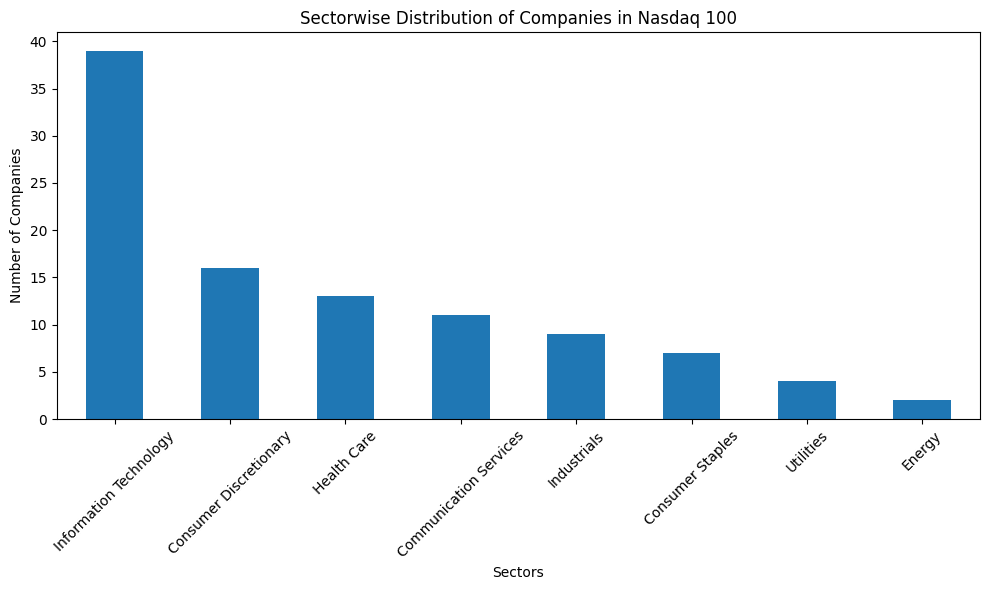

In [ ]:
# Summary statistics for historical stock data
print("Historical Stock Data Summary:")
print(historical_data.describe())

# Basic information of the dataset
print("Nasdaq-100 Dataset Summary:")
print(nasdaq_100_data.info())

# Plot distribution of companies by sector
sector_distribution = nasdaq_100_data.groupby('GICS\xa0Sector').size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sector_distribution.plot(kind='bar')
plt.title('Sectorwise Distribution of Companies in Nasdaq 100')
plt.ylabel('Number of Companies')
plt.xlabel('Sectors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of sectorwise distrubution:**

The Nasdaq 100 dataset contains 100 companies distributed across 8 sectors. The Information Technology sector dominates with 39 companies (39%), making it the most overrepresented sector, followed by Consumer Discretionary and Health Care.

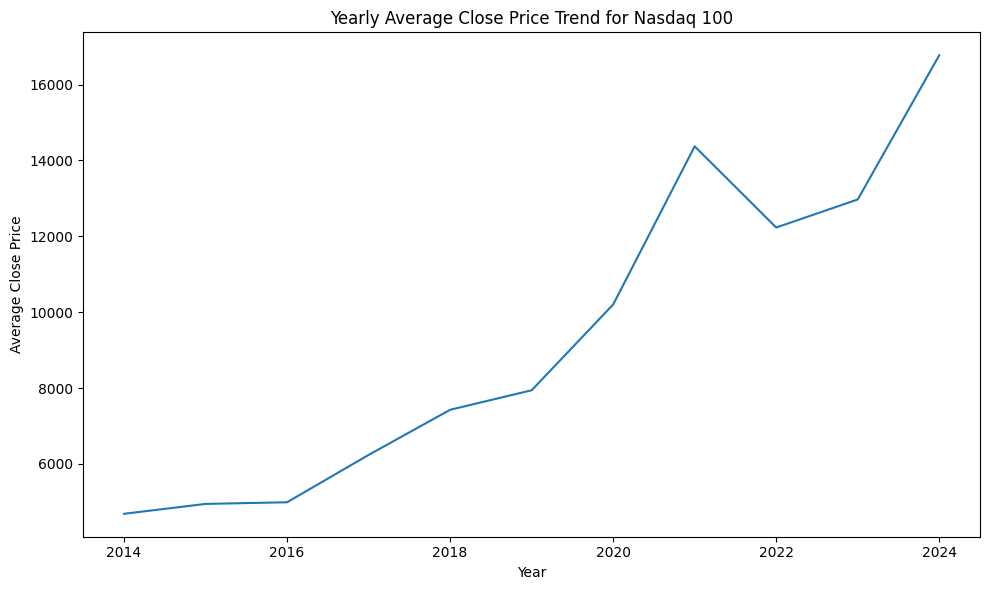

In [ ]:
# Group historical data by year to get yearly average close price
historical_data['Year'] = historical_data['Date'].dt.year
yearly_close = historical_data.groupby('Year')['Close/Last'].mean()

# Plot yearly average close price trend
plt.figure(figsize=(10, 6))
yearly_close.plot()
plt.title('Yearly Average Close Price Trend for Nasdaq 100')
plt.ylabel('Average Close Price')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

**Interpretation of yearly average close price trend:**

The yearly average closing prices shows a general upward trend over time with notable periods of growth and a few declines. The average closing prices rose consistently from 2014 to 2020, indicating a period of strong market performance. However, years such as 2020 show higher volatility due to the global pandemic.

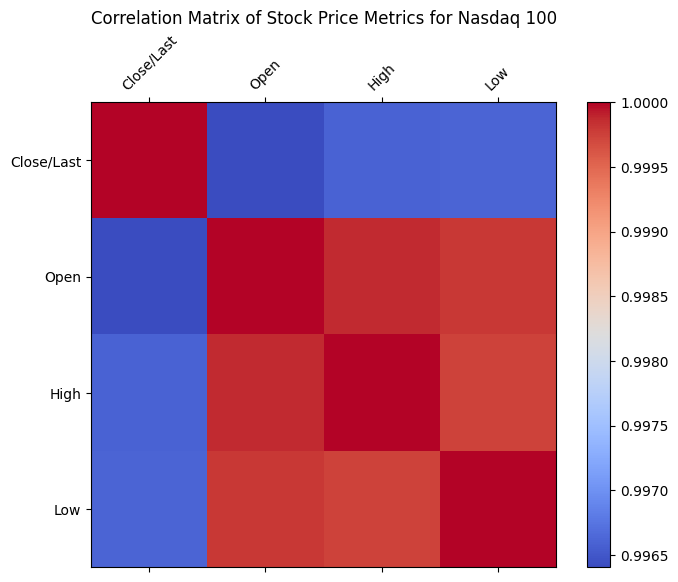

In [ ]:
# Investigate correlation between stock price metrics (Open, High, Low, Close)
correlation_matrix = historical_data[['Close/Last', 'Open', 'High', 'Low']].corr()

# Plot correlation matrix for stock price metrics
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix of Stock Price Metrics for Nasdaq 100')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

**Interpretation of stock price metrics correlations:**

There is a strong positive correlation between the stock price metrics. The correlation values are very close to 1 which indicates that these metrics tend to move in the same direction. When a stock's high price increases, the closing price tends to increase in tandem.

In [ ]:
# Calculate volatility as difference between High and Low prices
historical_data['Volatility'] = historical_data['High'] - historical_data['Low']

# Split data into pre 2018 and post 2018 periods
pre_2018_volatility = historical_data[historical_data['Year'] < 2018]['Volatility']
post_2018_volatility = historical_data[historical_data['Year'] >= 2018]['Volatility']

# Perform a t-test to check if volatility differs significantly between the two periods
t_stat, p_value = ttest_ind(pre_2018_volatility, post_2018_volatility)

# Display t-test results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -31.31587358156426, P-value: 3.600262292146294e-182


Null hypothesis: There is no significant difference in stock price volatility before and after 2018.

Alternative hypothesis: There is a significant difference in stock price volatility before and after 2018.

The t-test results in a t-statistic of -31.32 and a p-value of 3.6e-182. This extremely small p-value strongly rejects the null hypothesis, indicating that stock volatility has significantly increased after 2018.

**Interpretation of the t-test result:**

Since the p-value of 3.6e-182 is less than the significance value of 0.05, the result is statistically significant, meaning that the volatility of Nasdaq 100 before and after 2018 is significantly different.